In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv("/Users/devpratapsinghtomar/Desktop/Bootcamp/Day 1/Assignment 3/Ice_cream selling data.csv")
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [42]:
df.shape

(49, 2)

In [43]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [45]:
df.sample(5)

,Temperature (°C),Ice Cream Sales (units)
38,2.959932,21.342916
46,4.130868,34.530743
27,1.024181,2.313806
13,-1.818938,10.012868
24,0.688781,2.576782


In [46]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
dtype: bool

In [47]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

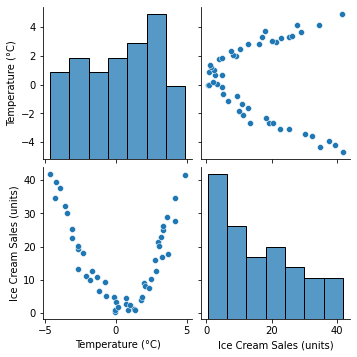

In [49]:
sns.pairplot(df)

<AxesSubplot:xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

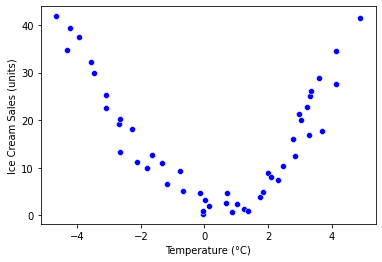

In [50]:
sns.scatterplot(x='Temperature (°C)', y='Ice Cream Sales (units)', data=df, color='blue')

In [54]:
correlation=df.corr()
correlation

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


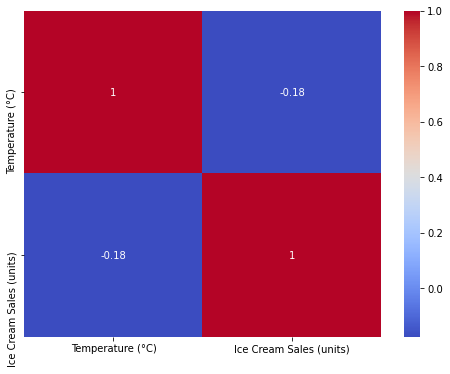

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [14]:
x=df.drop("Ice Cream Sales (units)",axis=1)
y=df["Ice Cream Sales (units)"]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [24]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)


LinearRegression()

In [25]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

3.6551709920906266

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))

In [59]:
lin_reg_model.coef_

array([-0.74219439])

In [60]:
lin_reg_model.intercept_

16.708758190473553

In [61]:
poly_reg_model.coef_

array([-0.58415772,  1.83742584])

In [62]:
lin_reg_rmse

11.449028541562269

In [68]:
mse = mean_squared_error(y_test, poly_reg_y_predicted)
r2 = r2_score(y_test, poly_reg_y_predicted)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 13.360274981420774
R-squared: 0.8994543494249359


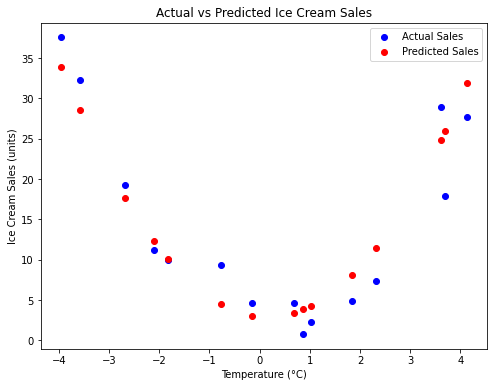

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.scatter(X_test, poly_reg_y_predicted , color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Ice Cream Sales')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()